# Neale diseases pathways (Pascal) and vascular phenotypes pathways (Pascal)
# UNFINISHED!!!!!

##### First version 18/01/2023
##### Latest modif 11/08/2023

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from datetime import datetime
import os
import glob
from matplotlib.colors import LogNorm, Normalize

DATE = datetime.now().strftime("%Y-%m-%d")

In [70]:
p_value_min = 5.8  # -math.log10(0.05/len(x))
directory_genes='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/2022_11_23_covar_fix/' #genes_diseases/'
directory_diseases_neale_pascal = '/NVME/decrypted/VARIANTS_AUX_SOV/' #'/HDD/data/ukbb/disease_sumstats/VARIANTS/'

MAIN_LABELS='mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,ratio_VD,VD_orig_artery,bifurcations,VD_orig_vein,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
MAIN_NAMES='A temporal angle,V temporal angle,V tortuosity,A tortuosity,ratio tortuosity,A central retinal eq,ratio central retinal eq,A std diameter,V std diameter,V central retinal eq,ratio vascular density,A vascular density,bifurcations,V vascular density,A median diameter,V median diameter,ratio median diameter'
all_files = list(MAIN_LABELS.split(","))
all_files_new = list(MAIN_NAMES.split(","))

path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/gcorr_diseases/'

In [71]:
only_continuos = False # True
only_True_and_True_only = True 


### Read from csv
file_info_name='pheno_diseases_info.csv'

df_inf_csv = pd.read_csv(f'~/retina-phenotypes/complementary/{file_info_name}')
print('len(df_inf_csv):', len(df_inf_csv))
df_inf_filt =  df_inf_csv[df_inf_csv['pascal_analysis']!='NOT_AVAILABLE']
print('len(df_inf_filt):', len(df_inf_filt))


if only_continuos:
    df_inf_filt =  df_inf_filt[(df_inf_filt['dtype'] == 'con') | (df_inf_filt['dtype'] == 'cat')]
    print('len(df_inf_filt):', len(df_inf_filt))
    df_inf_filt = df_inf_filt[df_inf_filt['name_LR'] != 'N_cigarettes_curr_daily_both']

#print(df_inf_filt['pascal_analysis'].value_counts())

if only_True_and_True_only:
    df_inf_filt = df_inf_filt[((df_inf_filt['pascal_analysis'] == 'TRUE') | (df_inf_filt['pascal_analysis'] == 'TRUE_only') | (df_inf_filt['pascal_analysis'] == 'TRUE_only_BUT_GENE_SCORING_INCOMPLETE') | (df_inf_filt['pascal_analysis'] == 'TRUE_BUT_GENE_SCORING_INCOMPLETE') | (df_inf_filt['pascal_analysis'] == 'included_NO_GENES')) & (df_inf_filt['lscr_analysis'] == 'TRUE')]
    print('len(df_inf_filt):', len(df_inf_filt))

diseases_traits_old = list(df_inf_filt['datafield'].values)
diseases_traits_new = list(df_inf_filt['final_name'].values)

len(df_inf_csv): 89
len(df_inf_filt): 74
len(df_inf_filt): 20


In [72]:
os.chdir(directory_diseases_neale_pascal)
l_diseases_all=[]


### compute df with Neale diseases' genes
list_neale_genes = df_inf_filt['Neale_gwas'] + '__pathway_scores.txt'

In [73]:
for file in list_neale_genes: #glob.glob("*__gene_scores"):  file.startswith('only_rs_notna_mod_variants'):
    try:
        df = pd.read_csv(directory_diseases_neale_pascal+file, delimiter=' ', names =['pathway', 'one', 'second', 'p']) #delimiter='\t', names =['gen', 'p']) #, index_col=None, header=0)
        #print(file)
        df['file_col']=file
        df['-log10(p)'] = -np.log10(df['p'])
        y = df[df['-log10(p)'] >= p_value_min]
        df_significant = y.sort_values('-log10(p)', ascending=False)
        pheno, b = file.split(".gwas.")
        aux, pheno_name = pheno.split("rs_notna_mod_variants_")

        data={
        'pheno':  pheno,
        'name_pheno': pheno_name,
        'N pathway': len(df_significant),
        'names': df_significant['pathway'].to_list()
        }
        l_diseases_all.append(data)
    except Exception:
        print('No possible to open:', file)
        continue

df_genes_neale = pd.DataFrame(l_diseases_all)

df_genes_neale

#######df_genes_neale= pd.read_csv('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/'+neale_csv_name, converters={'names': pd.eval})

#df_genes_neale['liststring'] = [''.join(map(str, l)) for l in df_genes_neale['names']]
#df_genes_neale['names'].iloc[4][2]
#list_pheno_neale=['4079_irnt'] #list(df_genes_neale['pheno'])
#['4080_irnt', '102_irnt', '4056_irnt', '5610_3', '4079_irnt', '1717', '3894_irnt']

#df_genes_neale_red = df_genes_neale[df_genes_neale["name_pheno"].isin(list_pheno_neale)]
#df_genes_neale_red['pheno_name'] = ['SBP_irnt', 'PR_irnt', 'Stroke_irnt', 'Presbyopia_3', 'DBP_irnt', 'Skin_color', 'heart_attack_irnt']

No possible to open: qc_only_rs_notna_mod_variants_6150_4.gwas.imputed_v3.both_sexes.tsv__pathway_scores.txt
No possible to open: only_rs_notna_mod_variants_102_irnt.gwas.imputed_v3.both_sexes.tsv__pathway_scores.txt
No possible to open: only_rs_notna_mod_variants_21021_irnt.gwas.imputed_v3.both_sexes.tsv__pathway_scores.txt
No possible to open: only_rs_notna_mod_variants_30780_irnt.gwas.imputed_v3.both_sexes.tsv__pathway_scores.txt
No possible to open: only_rs_notna_mod_variants_30870_irnt.gwas.imputed_v3.both_sexes.tsv__pathway_scores.txt
No possible to open: only_rs_notna_mod_variants_1558.gwas.imputed_v3.both_sexes.tsv__pathway_scores.txt
No possible to open: only_rs_notna_mod_variants_21001_irnt.gwas.imputed_v3.both_sexes.tsv__pathway_scores.txt
No possible to open: qc_only_rs_notna_mod_variants_6148_2.gwas.imputed_v3.both_sexes.tsv__pathway_scores.txt
No possible to open: qc_only_rs_notna_mod_variants_6147_1.gwas.imputed_v3.both_sexes.v2.tsv__pathway_scores.txt
No possible to ope

,pheno,name_pheno,N pathway,names
0,only_rs_notna_mod_variants_4079_irnt,4079_irnt,39,"[chr6p22, GGGTGGRR_PAX4_03, HNF4_01, MURARO_PA..."
1,only_rs_notna_mod_variants_4080_irnt,4080_irnt,88,"[GGGTGGRR_PAX4_03, GO_POSITIVE_REGULATION_OF_N..."
2,only_rs_notna_mod_variants_30760_irnt,30760_irnt,167,"[GO_PROTEIN_CONTAINING_COMPLEX_REMODELING, WP_..."
3,only_rs_notna_mod_variants_30750_irnt,30750_irnt,196,"[HP_SPLENOMEGALY, HP_ABNORMALITY_OF_THE_LIVER,..."
4,qc_only_rs_notna_mod_variants_20116_0,20116_0,31,"[MANNO_MIDBRAIN_NEUROTYPES_HNBGABA, MANNO_MIDB..."
5,qc_only_rs_notna_mod_variants_20116_2,20116_2,16,"[MANNO_MIDBRAIN_NEUROTYPES_HNBGABA, MANNO_MIDB..."
6,qc_only_rs_notna_mod_variants_6148_4,6148_4,0,[]
7,qc_only_rs_notna_mod_variants_6150_1,6150_1,16,"[REACTOME_PLASMA_LIPOPROTEIN_REMODELING, REACT..."


In [74]:
### DELETE raws and delete '_irnt' (JUST IN CASE)
df_genes_neale=df_genes_neale[df_genes_neale['name_pheno'].str.endswith('_raw') == False]
df_genes_neale['name_pheno'] = df_genes_neale['name_pheno'].str.replace('_irnt', '')
df_genes_neale

,pheno,name_pheno,N pathway,names
0,only_rs_notna_mod_variants_4079_irnt,4079,39,"[chr6p22, GGGTGGRR_PAX4_03, HNF4_01, MURARO_PA..."
1,only_rs_notna_mod_variants_4080_irnt,4080,88,"[GGGTGGRR_PAX4_03, GO_POSITIVE_REGULATION_OF_N..."
2,only_rs_notna_mod_variants_30760_irnt,30760,167,"[GO_PROTEIN_CONTAINING_COMPLEX_REMODELING, WP_..."
3,only_rs_notna_mod_variants_30750_irnt,30750,196,"[HP_SPLENOMEGALY, HP_ABNORMALITY_OF_THE_LIVER,..."
4,qc_only_rs_notna_mod_variants_20116_0,20116_0,31,"[MANNO_MIDBRAIN_NEUROTYPES_HNBGABA, MANNO_MIDB..."
5,qc_only_rs_notna_mod_variants_20116_2,20116_2,16,"[MANNO_MIDBRAIN_NEUROTYPES_HNBGABA, MANNO_MIDB..."
6,qc_only_rs_notna_mod_variants_6148_4,6148_4,0,[]
7,qc_only_rs_notna_mod_variants_6150_1,6150_1,16,"[REACTOME_PLASMA_LIPOPROTEIN_REMODELING, REACT..."


In [75]:
df_aux=pd.DataFrame([])
l_diseases_intersection= []
df_file_form=pd.DataFrame(columns=all_files, index = list(df_genes_neale['name_pheno']))
j=-1
for file in all_files:
    j=j+1
    # Read csvs
    df = pd.read_csv(directory_genes+file+'__pathway_scores.txt', delimiter=' ', names =['pathway', 'one', 'second', 'p']) #, index_col=None, header=0)
    df['file_col']=file

    # From p to -log10(p)
    df['-log10(p)'] = -np.log10(df['p'])
    y = df[df['-log10(p)'] >= p_value_min]
    df_significant = y.sort_values('-log10(p)', ascending=False)
    #phenotype_genes=df_significant['pathway'].to_list()
    set_pheno=set(df_significant['pathway'])
    print(file)
    for i in range(len(df_genes_neale)):
        if len(df_genes_neale['names'].iloc[i]) !=0: 
            set_neale=set(df_genes_neale['names'].iloc[i])
           # print(file, df_genes_neale['name_pheno'].iloc[i])
            print(df_genes_neale['name_pheno'].iloc[i], len(set_neale),len(set_pheno & set_neale))
            #print(len(set_pheno), len(set_neale),len(set_pheno & set_neale))
            #print('Num of genes in pheno, neale, intersection: ',len(set_pheno), len(set_neale),len(set_pheno & set_neale))
            #print('Name of the genes intersection: ', set_pheno & set_neale, '\n')
            df_file_form.iloc[i][j]=len(set_pheno & set_neale) ## RELEVANT ONE
            
            data_intersection={
            'name_pheno': file,
            'name_disease':  df_genes_neale['name_pheno'].iloc[i],
            'len(set_neale)': len(set_neale),
            'len(set_pheno_set_neale)': len(set_pheno & set_neale),
            'name_genes_inters': set_pheno & set_neale
            }
            l_diseases_intersection.append(data_intersection)
        else:
            continue
        #df_data_intersection=pd.DataFrame(data_intersection)

    print('\n')
#print(l_diseases_intersection)
df_genes_neale_intersection = pd.DataFrame(l_diseases_intersection)
    

mean_angle_taa
4079 39 0
4080 88 0
30760 167 0
30750 196 0
20116_0 31 1
20116_2 16 1
6150_1 16 0


mean_angle_tva
4079 39 0
4080 88 0
30760 167 0
30750 196 0
20116_0 31 0
20116_2 16 0
6150_1 16 0


tau1_vein
4079 39 1
4080 88 0
30760 167 0
30750 196 0
20116_0 31 0
20116_2 16 0
6150_1 16 0


tau1_artery
4079 39 3
4080 88 5
30760 167 1
30750 196 2
20116_0 31 1
20116_2 16 0
6150_1 16 0


ratio_AV_DF
4079 39 1
4080 88 1
30760 167 0
30750 196 0
20116_0 31 0
20116_2 16 0
6150_1 16 0


eq_CRAE
4079 39 0
4080 88 0
30760 167 0
30750 196 0
20116_0 31 0
20116_2 16 0
6150_1 16 0


ratio_CRAE_CRVE
4079 39 1
4080 88 1
30760 167 0
30750 196 0
20116_0 31 0
20116_2 16 0
6150_1 16 0


D_A_std
4079 39 1
4080 88 0
30760 167 0
30750 196 1
20116_0 31 1
20116_2 16 0
6150_1 16 0


D_V_std
4079 39 1
4080 88 1
30760 167 0
30750 196 0
20116_0 31 0
20116_2 16 0
6150_1 16 0


eq_CRVE
4079 39 1
4080 88 1
30760 167 0
30750 196 0
20116_0 31 0
20116_2 16 0
6150_1 16 0


ratio_VD
4079 39 2
4080 88 2
30760 167 2
30750 1

In [76]:

df_file_form_2 = df_file_form.dropna()

df_file_form_2 = df_file_form_2.T
#df_file_proper_format.dtypes
df_file_form_2= df_file_form_2.astype(np.int64)

def rename_col_index(df, l_diseases_old, l_diseases_new, l_phenos_old, l_phenos_new):
    df.rename(index=dict(zip(l_phenos_old, l_phenos_new)), inplace=True)
    df.rename(columns=dict(zip(l_diseases_old, l_diseases_new)), inplace=True)
    return df

df_file_form_2= rename_col_index(df_file_form_2, diseases_traits_old, diseases_traits_new, all_files, all_files_new)
#df_file_form_2[[list(diseases_traits.values())]]


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'A temporal angle'),
  Text(1.5, 0, 'V temporal angle'),
  Text(2.5, 0, 'V tortuosity'),
  Text(3.5, 0, 'A tortuosity'),
  Text(4.5, 0, 'ratio tortuosity'),
  Text(5.5, 0, 'A central retinal eq'),
  Text(6.5, 0, 'ratio central retinal eq'),
  Text(7.5, 0, 'A std diameter'),
  Text(8.5, 0, 'V std diameter'),
  Text(9.5, 0, 'V central retinal eq'),
  Text(10.5, 0, 'ratio vascular density'),
  Text(11.5, 0, 'A vascular density'),
  Text(12.5, 0, 'bifurcations'),
  Text(13.5, 0, 'V vascular density'),
  Text(14.5, 0, 'A median diameter'),
  Text(15.5, 0, 'V median diameter'),
  Text(16.5, 0, 'ratio median diameter')])

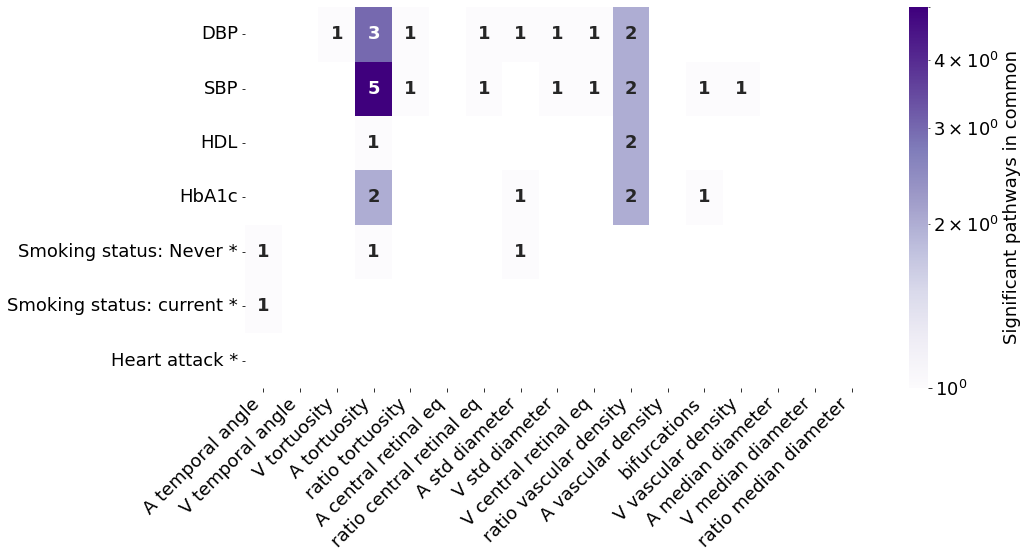

In [77]:
plt.rcParams['font.size'] = '18'
#figsize_val_2=(15, 15)
figsize_val_2=(14, 7)
df_file_proper_format_plots = df_file_form_2 #[list(diseases_traits_old)]
fig, ax = plt.subplots(figsize=figsize_val_2)

fig1 = sns.heatmap(df_file_proper_format_plots.T, annot=True, fmt=".0f", cbar=True, 
             annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_file_proper_format_plots.T).min().max(), 
            vmax=abs(df_file_proper_format_plots.T).max().max(), 
            cmap='Purples',alpha=1.0, cbar_kws={'label': 'Significant pathways in common'}, 
            norm=LogNorm()) #this allows to remove the color of the 0's
plt.xticks(rotation=45, ha='right')

In [78]:
print(df_genes_neale_intersection.columns)
for i in range(len(df_genes_neale_intersection)):
    print( df_genes_neale_intersection['name_pheno'].iloc[i], df_genes_neale_intersection['name_disease'].iloc[i], df_genes_neale_intersection['name_genes_inters'].iloc[i])


# 6150_2 = angina -> LINC00461
# 6150_1 = Heart attack  -> COL4A1, ARIH2OS, SH2B3, 'ATXN2'
#Glaucoma *,6148_2 -> 'SIX6', 'RP11-1042B17.5', 'C14orf39', 'SIX1'

Index(['name_pheno', 'name_disease', 'len(set_neale)',
       'len(set_pheno_set_neale)', 'name_genes_inters'],
      dtype='object')
mean_angle_taa 4079 set()
mean_angle_taa 4080 set()
mean_angle_taa 30760 set()
mean_angle_taa 30750 set()
mean_angle_taa 20116_0 {'GO_NEURON_DIFFERENTIATION'}
mean_angle_taa 20116_2 {'GO_NEURON_DIFFERENTIATION'}
mean_angle_taa 6150_1 set()
mean_angle_tva 4079 set()
mean_angle_tva 4080 set()
mean_angle_tva 30760 set()
mean_angle_tva 30750 set()
mean_angle_tva 20116_0 set()
mean_angle_tva 20116_2 set()
mean_angle_tva 6150_1 set()
tau1_vein 4079 {'GO_NEGATIVE_REGULATION_OF_INTRACELLULAR_SIGNAL_TRANSDUCTION'}
tau1_vein 4080 set()
tau1_vein 30760 set()
tau1_vein 30750 set()
tau1_vein 20116_0 set()
tau1_vein 20116_2 set()
tau1_vein 6150_1 set()
tau1_artery 4079 {'MURARO_PANCREAS_ENDOTHELIAL_CELL', 'POU2AF1_TARGET_GENES', 'GGGTGGRR_PAX4_03'}
tau1_artery 4080 {'RYTTCCTG_ETS2_B', 'GO_POSITIVE_REGULATION_OF_CELLULAR_COMPONENT_ORGANIZATION', 'ZNF596_TARGET_GENES', 

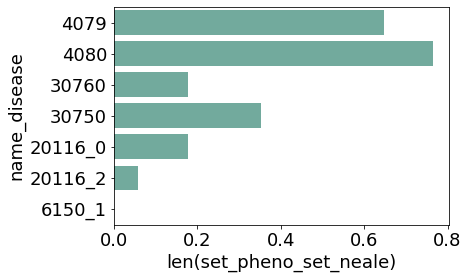

In [79]:
#df_genes_neale_intersection['len(set_pheno_set_neale)']
# plot a bar chart
sns.barplot(
    x="len(set_pheno_set_neale)", 
    y="name_disease", 
    data=df_genes_neale_intersection, 
    ci=None, 
    color='#69b3a2');

In [80]:
#df_genes_count[df_genes_count['Unnamed: 0']=='CTD-2008P7.9']